# Email Spam Detection using Artificial Intelligence and Machine Learning



Contributers:
-------------------

Andrew Champagne    
Leah Strecker      
Suman Bhandari       
Ujjwal Pandit

In this project we will utilize Python to create a spam email detection system.
Our objective is to ___________

We will follow the standard data science protocol from data acquisition, preprocessing, feature extraction, model training, evaluation and making predictions.


#### Lets get started!

In [40]:
# Importing necessary libraries over here

# Pandas for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# NLTK for text preprocessing tasks like tokenization and stop word removal
import csv 
import string
import nltk
from nltk.tokenize import word_tokenize

from collections import Counter
import matplotlib.pyplot as plt


# Scikit-learn for machine learning algorithms
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Read the dataset
df = pd.read_csv('mail_data.csv')

In [3]:
df.shape

(5572, 2)

In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

Data Visualization

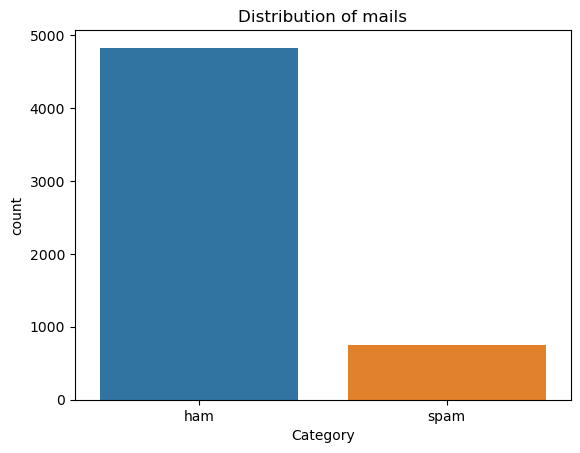

In [6]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

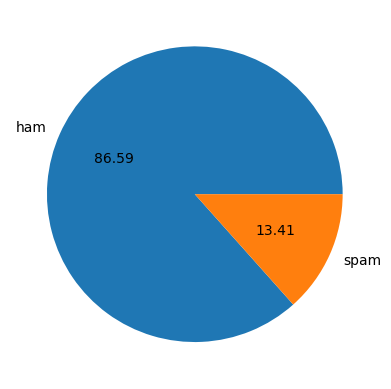

In [7]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

Data Preprocessing

In [8]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [9]:
# Separate the feature (message) and target (category) data

X = df["Message"]
Y = df["Category"]

In [10]:
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()

In [11]:
# List of stop words from my friend
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
    "your", "yours", "yourself", "yourselves", "he", "him", "his", 
    "himself", "she", "her", "hers", "herself", "it", "its", "itself", 
    "they", "them", "their", "theirs", "themselves", "what", "which", 
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", 
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
    "or", "because", "as", "until", "while", "of", "at", "by", "for", 
    "with", "about", "against", "between", "into", "through", "during", 
    "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", 
    "both", "each", "few", "more", "most", "other", "some", "such", "no", 
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
    "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", 
    "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", 
    "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", 
    "shan", "shouldn", "wasn", "weren", "won", "wouldn"
])

# Tokenize and remove stop words from spam_words
tokens = word_tokenize(" ".join(spam_words))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Print or use filtered_tokens as needed
print(filtered_tokens)


['Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'Text', 'FA', '87121', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', '&', 'C', "'s", 'apply', '08452810075over18', "'s", 'FreeMsg', 'Hey', 'darling', "'s", '3', 'week', "'s", 'word', 'back', '!', "'d", 'like', 'fun', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'send', ',', '£1.50', 'rcv', 'WINNER', '!', '!', 'valued', 'network', 'customer', 'selected', 'receivea', '£900', 'prize', 'reward', '!', 'claim', 'call', '09061701461', '.', 'Claim', 'code', 'KL341', '.', 'Valid', '12', 'hours', '.', 'mobile', '11', 'months', '?', 'U', 'R', 'entitled', 'Update', 'latest', 'colour', 'mobiles', 'camera', 'Free', '!', 'Call', 'Mobile', 'Update', 'Co', 'FREE', '08002986030', 'SIX', 'chances', 'win', 'CASH', '!', '100', '20,000', 'pounds', 'txt', '>', 'CSH11', 'send', '87575', '.', 'Cost', '150p/day', ',', '6days', ',', '16+', 'TsandCs', 'apply', 'Reply', 'HL', '4', 'info

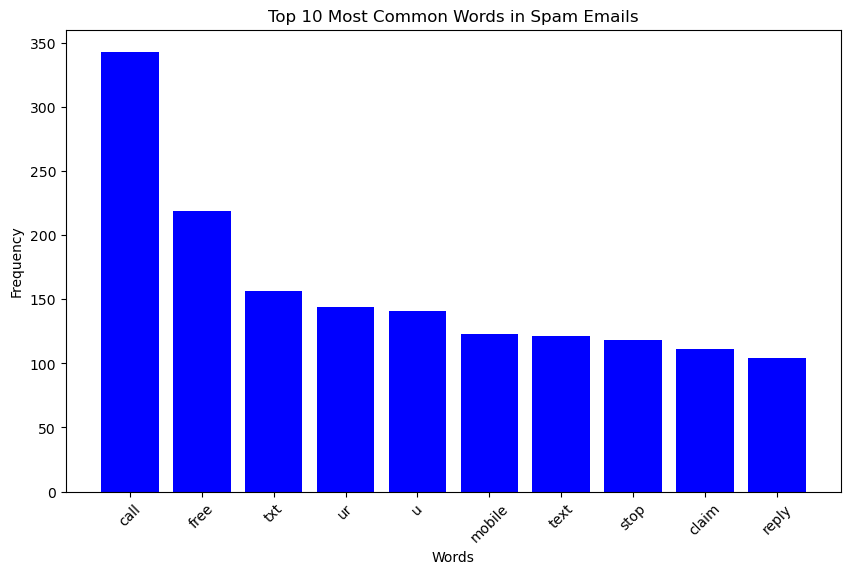

In [12]:
filtered_word_freq = Counter([word.lower() for word in filtered_tokens if word.lower() not in stop_words and word.isalpha()])

# Plot the top 10 most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*filtered_word_freq.most_common(10)), color='b')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()


Training the ML Models

In [18]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [19]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [22]:
# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [24]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [25]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [26]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

Model Selection

#  Create and Fit Logistic Regression Model


In [27]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [28]:
 #Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [29]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9670181736594121


In [30]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [31]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9659192825112107


Testing the model with an email messages

In [32]:
new_mail=["Congratulations, you got admitted to NKU for the Fall 2024 for Bachelors in Data Science"]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


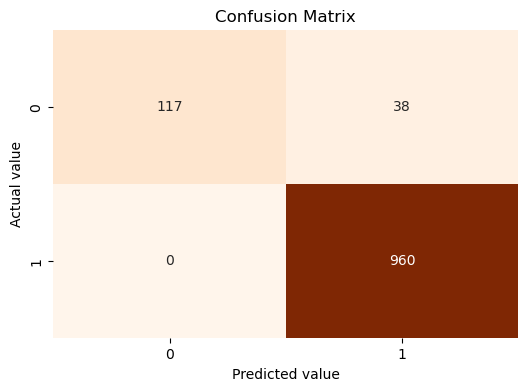

In [33]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

Neural Network

In [36]:
mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) 
mlp_classifier_model.fit(X_train_features, Y_train)  

prediction = mlp_classifier_model.predict(X_test_features)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(Y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(Y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(Y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(Y_test, prediction)))

MLP Classifier
Accuracy score: 0.99
Precision score: 0.98
Recall score: 1.00
F1 score: 0.99


Multinomial Naive Bayes

In [39]:
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train_features, Y_train)  # Train the model

prediction = multinomial_nb_model.predict(X_test_features)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(Y_test, prediction)) )
print("Precision score: {}". format(precision_score(Y_test, prediction)) )
print("Recall score: {}". format(recall_score(Y_test, prediction)))
print("F1 score: {}". format(f1_score(Y_test, prediction)))

Multinomial NB
Accuracy score: 0.9730941704035875
Precision score: 0.9696969696969697
Recall score: 1.0
F1 score: 0.9846153846153847


Bernoulli Naive Bayes

In [41]:
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(X_train_features, Y_train)

prediction = bernoulli_nb_model.predict(X_test_features)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(Y_test, prediction)) )
print("Precision score: {}". format(precision_score(Y_test, prediction)) )
print("Recall score: {}". format(recall_score(Y_test, prediction)))
print("F1 score: {}". format(f1_score(Y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9739910313901345
Precision score: 0.9706774519716885
Recall score: 1.0
F1 score: 0.9851205746536685


Confusion Matrix

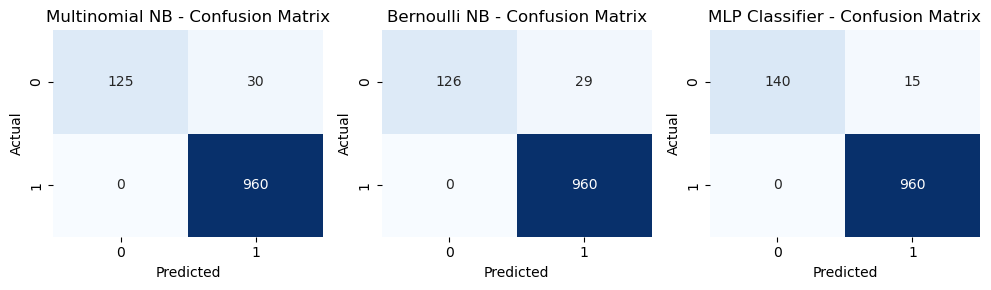

In [43]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(X_test_features)
    cm = confusion_matrix(Y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

Metric Comparision Heatmap

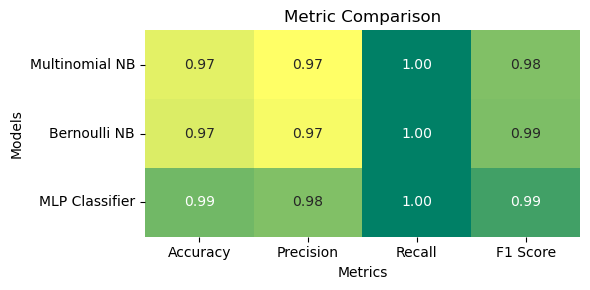

In [45]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(X_test_features)
    accuracy = accuracy_score(Y_test, prediction)
    precision = precision_score(Y_test, prediction)
    recall = recall_score(Y_test, prediction)
    f1 = f1_score(Y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()



All three models perform exceptionally well, with high accuracy scores.

The final choice of model always depend upon what is needed to be filtered & hence model can be adjusted to improve recall or precision.

If you want to minimize the number of false negatives i.e spam messages don't end up in the user's inbox you would like to have high Recall.
On the other hand with high precision(false negatives), one might miss important messages because the model is overly cautious in classifying messages as spam.